In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data8.csv to Data8 (1).csv
Saving Data6.csv to Data6 (1).csv
Saving Data7.csv to Data7 (1).csv
Saving Data5.csv to Data5 (1).csv
Saving Data4.csv to Data4 (1).csv
Saving Data3.csv to Data3 (1).csv
Saving Data2.csv to Data2 (1).csv
Saving Data1.csv to Data1 (1).csv


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATASET - 1**

In [ ]:
df_data1 = pd.read_csv('Data1.csv')
df_data1.head()

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

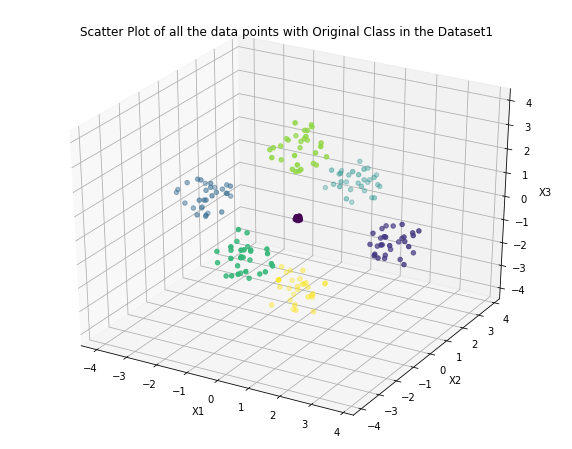

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data1['X1'],df_data1['X2'],df_data1['X3'], marker="o",c=df_data1['Class'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Original Class in the Dataset1')
plt.show()

**Applying the K-Means Clustering method**

In [ ]:
from sklearn.cluster import KMeans
mdl_df_data1 = KMeans(n_clusters=1)
mdl_df_data1.fit(df_data1.iloc[:,1:4])
print('SSE result is : '+ str(mdl_df_data1.inertia_))

SSE result is : 1721.4679351991847


In [ ]:
#Now checking k-Means for different values of K from 1 to 10 and compare the SSE values
for i in range(1,11):
  mdl_df_data1 = KMeans(n_clusters=i)
  mdl_df_data1.fit(df_data1.iloc[:,1:4])
  print('SSE result for '+ str(i)+' clusters is: '+ str(mdl_df_data1.inertia_))

SSE result for 1 clusters is: 1721.4679351991847
SSE result for 2 clusters is: 1236.7211813246638
SSE result for 3 clusters is: 982.4102884206418
SSE result for 4 clusters is: 710.3922862388597
SSE result for 5 clusters is: 448.6334486571893
SSE result for 6 clusters is: 233.37073165897863
SSE result for 7 clusters is: 106.14764659310868
SSE result for 8 clusters is: 98.76614118688804
SSE result for 9 clusters is: 92.30397381854752
SSE result for 10 clusters is: 85.0169581029839


**We could see that for K = 7,8,9 and 10 the SSE Values are less. Hence, we will calculate F1 Score and accuracy for k = 7, 8, 9, and 10 to determine the best model**

In [ ]:
df_data1_k7 = df_data1[['X1','X2','X3','Class']]
df_data1_k7.head()

X1        X2        X3  Class
0 -0.063274  0.027734  0.022683      1
1 -0.000731  0.048211  0.069198      1
2 -0.060767 -0.009080  0.053085      1
3  0.013252 -0.011876  0.055324      1
4 -0.054508 -0.003813  0.001738      1

In [ ]:
#For k = 7
from sklearn.cluster import KMeans
mdl_df_data1_k7 = KMeans(n_clusters=7)
mdl_df_data1_k7.fit(df_data1_k7.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data1_k7.inertia_))

SSE result is : 106.14764659310868


In [ ]:
df_data1_k7['P_Class_Model'] = mdl_df_data1_k7.labels_

In [ ]:
df_data1_k7

X1        X2        X3  Class  P_Class_Model
0   -0.063274  0.027734  0.022683      1              0
1   -0.000731  0.048211  0.069198      1              0
2   -0.060767 -0.009080  0.053085      1              0
3    0.013252 -0.011876  0.055324      1              0
4   -0.054508 -0.003813  0.001738      1              0
..        ...       ...       ...    ...            ...
207  0.175738 -0.053478 -2.733752      7              1
208  0.396046 -0.858377 -3.126866      7              1
209 -0.406362 -0.334541 -2.885598      7              1
210 -0.299275  0.071281 -3.642585      7              1
211 -0.506192  0.433538 -2.608597      7              1

[212 rows x 5 columns]

**Using External Validation Techniquics**

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data1_k7['Class'],df_data1_k7['P_Class_Model'])

0.2830188679245283

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data1_k7['Class'],df_data1_k7['P_Class_Model'], average='micro'))
print(f1_score(df_data1_k7['Class'],df_data1_k7['P_Class_Model'], average='macro'))
print(f1_score(df_data1_k7['Class'],df_data1_k7['P_Class_Model'], average='weighted'))

0.2830188679245283
0.25
0.2830188679245283


**For K=8**

In [ ]:
#For K=8
df_data1_k8 = df_data1[['X1','X2','X3','Class']]

mdl_df_data1_k8 = KMeans(n_clusters=8)
mdl_df_data1_k8.fit(df_data1_k8.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data1_k8.inertia_))

SSE result is : 98.7669384201923


In [ ]:
df_data1_k8['P_Class_Model'] = mdl_df_data1_k8.labels_
df_data1_k8

X1        X2        X3  Class  P_Class_Model
0   -0.063274  0.027734  0.022683      1              6
1   -0.000731  0.048211  0.069198      1              6
2   -0.060767 -0.009080  0.053085      1              6
3    0.013252 -0.011876  0.055324      1              6
4   -0.054508 -0.003813  0.001738      1              6
..        ...       ...       ...    ...            ...
207  0.175738 -0.053478 -2.733752      7              5
208  0.396046 -0.858377 -3.126866      7              5
209 -0.406362 -0.334541 -2.885598      7              5
210 -0.299275  0.071281 -3.642585      7              5
211 -0.506192  0.433538 -2.608597      7              5

[212 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data1_k8['Class'],df_data1_k8['P_Class_Model'])

0.14150943396226415

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data1_k8['Class'],df_data1_k8['P_Class_Model'], average='micro'))
print(f1_score(df_data1_k8['Class'],df_data1_k8['P_Class_Model'], average='macro'))
print(f1_score(df_data1_k8['Class'],df_data1_k8['P_Class_Model'], average='weighted'))

0.14150943396226415
0.125
0.14150943396226415


**For K = 9**

In [ ]:
#For K=9
df_data1_k9 = df_data1[['X1','X2','X3','Class']]

mdl_df_data1_k9 = KMeans(n_clusters=9)
mdl_df_data1_k9.fit(df_data1_k9.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data1_k9.inertia_))

SSE result is : 91.53139778589602


In [ ]:
df_data1_k9['P_Class_Model'] = mdl_df_data1_k9.labels_
df_data1_k9

X1        X2        X3  Class  P_Class_Model
0   -0.063274  0.027734  0.022683      1              0
1   -0.000731  0.048211  0.069198      1              0
2   -0.060767 -0.009080  0.053085      1              0
3    0.013252 -0.011876  0.055324      1              0
4   -0.054508 -0.003813  0.001738      1              0
..        ...       ...       ...    ...            ...
207  0.175738 -0.053478 -2.733752      7              4
208  0.396046 -0.858377 -3.126866      7              4
209 -0.406362 -0.334541 -2.885598      7              4
210 -0.299275  0.071281 -3.642585      7              4
211 -0.506192  0.433538 -2.608597      7              4

[212 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data1_k9['Class'],df_data1_k9['P_Class_Model'])

0.4009433962264151

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data1_k9['Class'],df_data1_k9['P_Class_Model'], average='micro'))
print(f1_score(df_data1_k9['Class'],df_data1_k9['P_Class_Model'], average='macro'))
print(f1_score(df_data1_k9['Class'],df_data1_k9['P_Class_Model'], average='weighted'))

0.4009433962264151
0.352549889135255
0.4490022172949002


**For K=10**

In [ ]:
#For K=10
df_data1_k10 = df_data1[['X1','X2','X3','Class']]

mdl_df_data1_k10 = KMeans(n_clusters=10)
mdl_df_data1_k10.fit(df_data1_k10.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data1_k10.inertia_))

SSE result is : 85.1127171859356


In [ ]:
df_data1_k10['P_Class_Model'] = mdl_df_data1_k10.labels_
df_data1_k10

X1        X2        X3  Class  P_Class_Model
0   -0.063274  0.027734  0.022683      1              1
1   -0.000731  0.048211  0.069198      1              1
2   -0.060767 -0.009080  0.053085      1              1
3    0.013252 -0.011876  0.055324      1              1
4   -0.054508 -0.003813  0.001738      1              1
..        ...       ...       ...    ...            ...
207  0.175738 -0.053478 -2.733752      7              2
208  0.396046 -0.858377 -3.126866      7              2
209 -0.406362 -0.334541 -2.885598      7              2
210 -0.299275  0.071281 -3.642585      7              2
211 -0.506192  0.433538 -2.608597      7              2

[212 rows x 5 columns]

**External Validation**

**Accuracy Score:** It is used to calaculate the accuracy of either the fraction or count of correct predictions of a model. The formula for accuracy score is as below,

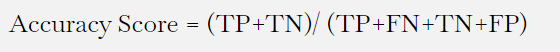

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data1_k10['Class'],df_data1_k10['P_Class_Model'])

0.45754716981132076

**F1 Score:** F1 score is a combination of precision and recall.

Computing the average of precision and recall gives the F1 score. The F1 score formula is shown here:


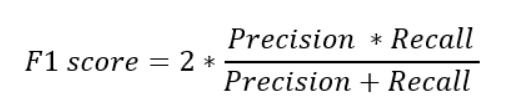

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data1_k10['Class'],df_data1_k10['P_Class_Model'], average='micro'))
print(f1_score(df_data1_k10['Class'],df_data1_k10['P_Class_Model'], average='macro'))
print(f1_score(df_data1_k10['Class'],df_data1_k10['P_Class_Model'], average='weighted'))

0.45754716981132076
0.3473404255319149
0.5009534323564834


**Out of all the above cultering models we could see that K=7 has more accuracy or f1_score**

**Building confusion for K=7**

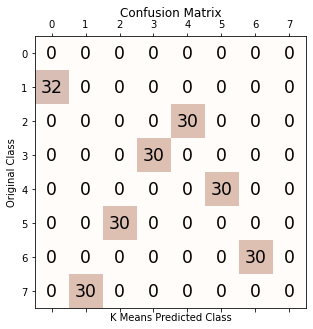

In [ ]:
from sklearn.metrics import confusion_matrix
df_conf_matrix = confusion_matrix(y_true=df_data1_k7['Class'], y_pred=df_data1_k7['P_Class_Model'])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
    for j in range(df_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('K Means Predicted Class')
plt.ylabel('Original Class')
plt.title('Confusion Matrix')
plt.show()

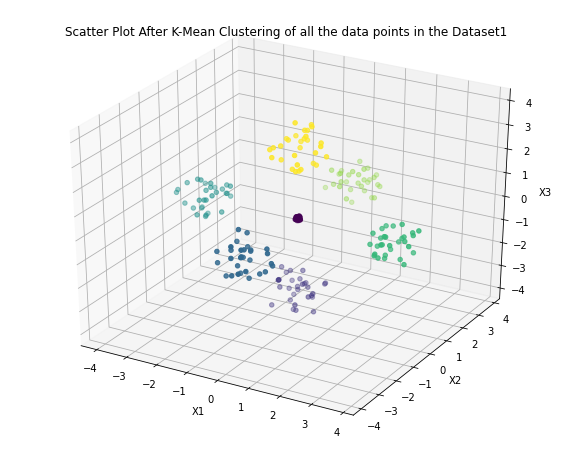

In [ ]:
#Visulaizing the data for k =7 
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data1_k7['X1'],df_data1_k7['X2'],df_data1_k7['X3'], marker="o",c=df_data1_k7['P_Class_Model'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot After K-Mean Clustering of all the data points in the Dataset1')
plt.show()

**Applying Hierarchial Clustering Method - Dataset1**

In [ ]:
df_data1.head()

Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1

In [ ]:
df_data1_hira_K2 = df_data1[['X1','X2','X3','Class']]
df_data1_hira_K2.head()

X1        X2        X3  Class
0 -0.063274  0.027734  0.022683      1
1 -0.000731  0.048211  0.069198      1
2 -0.060767 -0.009080  0.053085      1
3  0.013252 -0.011876  0.055324      1
4 -0.054508 -0.003813  0.001738      1

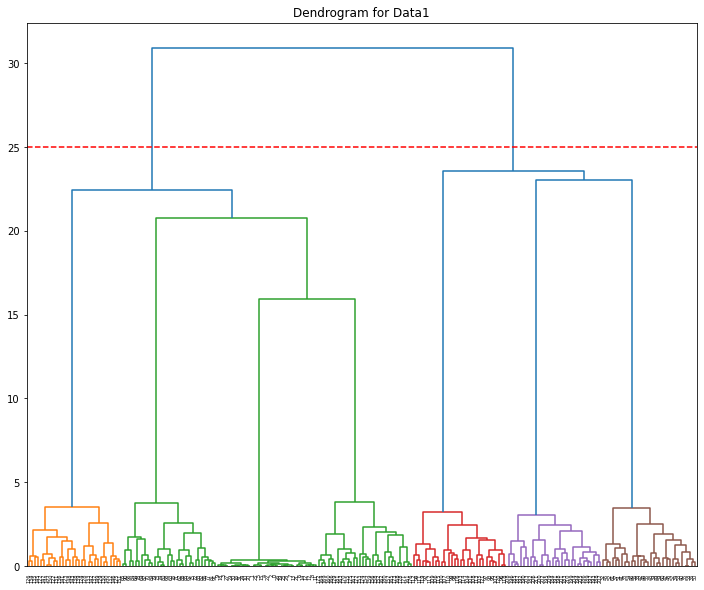

In [ ]:
#Ploting Dendrograms for the dataset1
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data1_hira_K2.iloc[:,0:3],method='ward'))
plt.axhline(y=25, color='r', linestyle='--')
plt.title('Dendrogram for Data1')
plt.show()

In [ ]:
#Now checking Hierarchial for 2 clusters and compare the SSE values

from sklearn.cluster import AgglomerativeClustering
cluster_hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_hier.fit_predict(df_data1_hira_K2.iloc[:,0:3])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df_data1_hira_K2['H_Class_Predt'] = cluster_hier.labels_
df_data1_hira_K2

X1        X2        X3  Class  H_Class_Predt
0   -0.063274  0.027734  0.022683      1              1
1   -0.000731  0.048211  0.069198      1              1
2   -0.060767 -0.009080  0.053085      1              1
3    0.013252 -0.011876  0.055324      1              1
4   -0.054508 -0.003813  0.001738      1              1
..        ...       ...       ...    ...            ...
207  0.175738 -0.053478 -2.733752      7              0
208  0.396046 -0.858377 -3.126866      7              0
209 -0.406362 -0.334541 -2.885598      7              0
210 -0.299275  0.071281 -3.642585      7              0
211 -0.506192  0.433538 -2.608597      7              0

[212 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data1_hira_K2['Class'],df_data1_hira_K2['H_Class_Predt'])

0.1509433962264151

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data1_hira_K2['Class'],df_data1_hira_K2['H_Class_Predt'], average='micro'))
print(f1_score(df_data1_hira_K2['Class'],df_data1_hira_K2['H_Class_Predt'], average='macro'))
print(f1_score(df_data1_hira_K2['Class'],df_data1_hira_K2['H_Class_Predt'], average='weighted'))

0.1509433962264151
0.051948051948051945
0.0627297231070816


In [ ]:
#For K = 7 
df_data1_hira_K7 = df_data1[['X1','X2','X3','Class']]

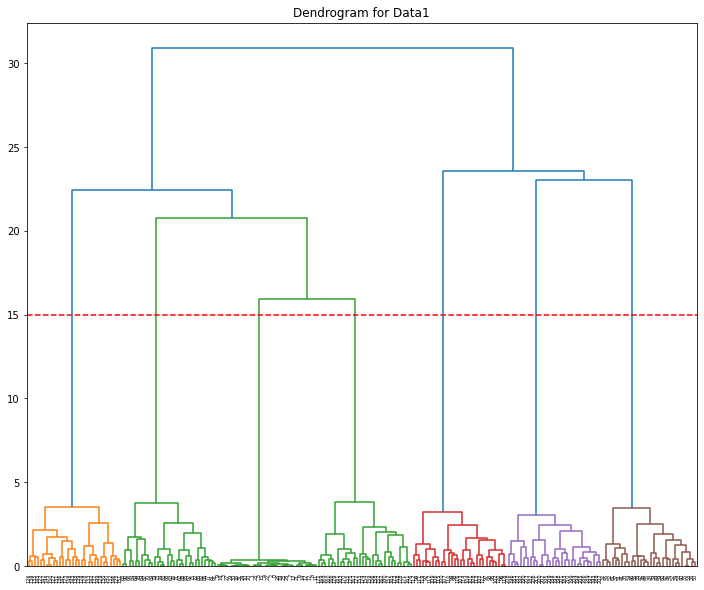

In [ ]:
#Ploting Dendrograms for the dataset1
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data1_hira_K7.iloc[:,0:3],method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.title('Dendrogram for Data1')
plt.show()

In [ ]:
#Now checking Hirarichal for 7 clusters

from sklearn.cluster import AgglomerativeClustering
cluster_hier_7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
cluster_hier_7.fit_predict(df_data1_hira_K7.iloc[:,0:3])

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
df_data1_hira_K7['H_Class_Predt'] = cluster_hier_7.labels_
df_data1_hira_K7

X1        X2        X3  Class  H_Class_Predt
0   -0.063274  0.027734  0.022683      1              6
1   -0.000731  0.048211  0.069198      1              6
2   -0.060767 -0.009080  0.053085      1              6
3    0.013252 -0.011876  0.055324      1              6
4   -0.054508 -0.003813  0.001738      1              6
..        ...       ...       ...    ...            ...
207  0.175738 -0.053478 -2.733752      7              3
208  0.396046 -0.858377 -3.126866      7              3
209 -0.406362 -0.334541 -2.885598      7              3
210 -0.299275  0.071281 -3.642585      7              3
211 -0.506192  0.433538 -2.608597      7              3

[212 rows x 5 columns]

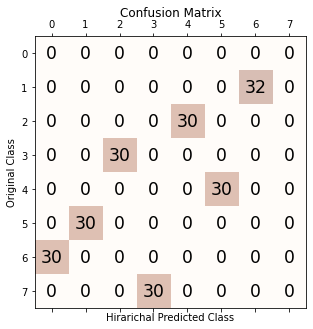

In [ ]:
#Confusion metrix 
from sklearn.metrics import confusion_matrix
df_conf_matrix = confusion_matrix(y_true=df_data1_hira_K7['Class'], y_pred=df_data1_hira_K7['H_Class_Predt'])
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(df_conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(df_conf_matrix.shape[0]):
    for j in range(df_conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=df_conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Hirarichal Predicted Class')
plt.ylabel('Original Class')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data1_hira_K7['Class'],df_data1_hira_K7['H_Class_Predt'])

0.0

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data1_hira_K7['Class'],df_data1_hira_K7['H_Class_Predt'], average='micro'))
print(f1_score(df_data1_hira_K7['Class'],df_data1_hira_K7['H_Class_Predt'], average='macro'))
print(f1_score(df_data1_hira_K7['Class'],df_data1_hira_K7['H_Class_Predt'], average='weighted'))

0.0
0.0
0.0


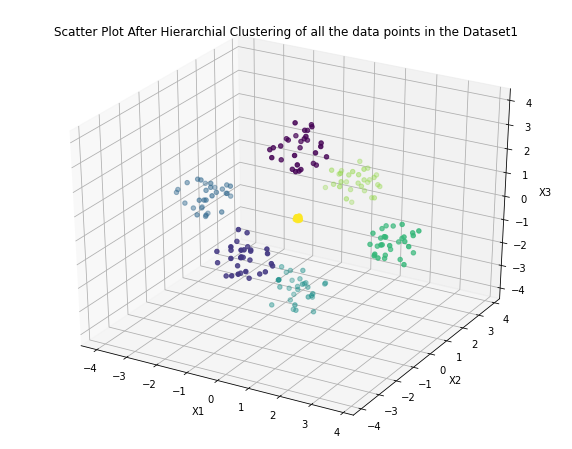

In [ ]:
#Visulaizing the data for k =7 
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data1_hira_K7['X1'],df_data1_hira_K7['X2'],df_data1_hira_K7['X3'], marker="o",c=df_data1_hira_K7['H_Class_Predt'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot After Hierarchial Clustering of all the data points in the Dataset1')
plt.show()

**DATASET - 2**

In [ ]:
df_data2 = pd.read_csv('Data2.csv')
df_data2.head()

Unnamed: 0         X         Y         C  Class
0         X1  3.277701  0.814082  0.326574      1
1         X2  0.387577  0.176780  0.888046      1
2         X3  0.268546  0.582963  0.080981      1
3         X4  2.031145  0.244597  0.643921      1
4         X5  0.188677  0.461280  0.496633      1

In [ ]:
df_data2.Class.unique()

array([1, 2, 3, 4])

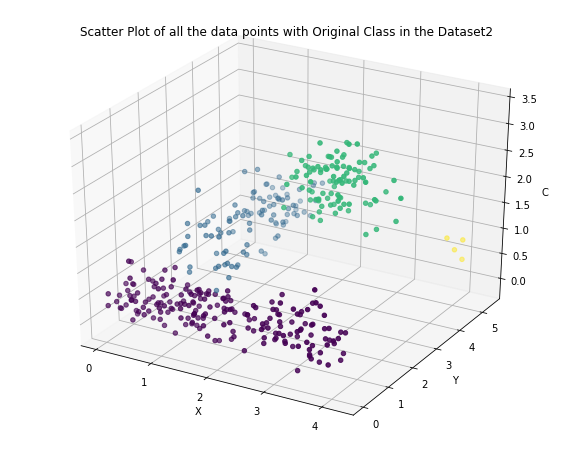

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data2['X'],df_data2['Y'],df_data2['C'], marker="o",c=df_data2['Class'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C')
plt.title('Scatter Plot of all the data points with Original Class in the Dataset2')
plt.show()

**Applying KMEANS**

In [ ]:
#Now applying k-Means for different values of K from 1 to 10 and compare the SSE values
for i in range(1,11):
  mdl_df_data2 = KMeans(n_clusters=i)
  mdl_df_data2.fit(df_data2.iloc[:,1:4])
  print('SSE result for '+ str(i)+' clusters is: '+ str(mdl_df_data2.inertia_))

SSE result for 1 clusters is: 1704.5614335108821
SSE result for 2 clusters is: 842.4282649349159
SSE result for 3 clusters is: 497.03588056622505
SSE result for 4 clusters is: 280.1321159627272
SSE result for 5 clusters is: 213.40102843558566
SSE result for 6 clusters is: 178.07230308868313
SSE result for 7 clusters is: 144.72588972385336
SSE result for 8 clusters is: 127.86910606409134
SSE result for 9 clusters is: 116.835909386859
SSE result for 10 clusters is: 106.56663696244232


**we are taking k = 4 based on the classes in data.**

In [ ]:
df_data2_k4 = df_data2[['X','Y','C','Class']]
df_data2_k4.head()

X         Y         C  Class
0  3.277701  0.814082  0.326574      1
1  0.387577  0.176780  0.888046      1
2  0.268546  0.582963  0.080981      1
3  2.031145  0.244597  0.643921      1
4  0.188677  0.461280  0.496633      1

In [ ]:
#For K = 4
from sklearn.cluster import KMeans
mdl_df_data2_k4 = KMeans(n_clusters=4)
mdl_df_data2_k4.fit(df_data2_k4.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data2_k4.inertia_))

SSE result is : 280.1321159627272


In [ ]:
df_data2_k4['P_Class_Model'] = mdl_df_data2_k4.labels_
df_data2_k4

X         Y         C  Class  P_Class_Model
0    3.277701  0.814082  0.326574      1              3
1    0.387577  0.176780  0.888046      1              0
2    0.268546  0.582963  0.080981      1              0
3    2.031145  0.244597  0.643921      1              3
4    0.188677  0.461280  0.496633      1              0
..        ...       ...       ...    ...            ...
399  3.248655  2.297291  3.388138      3              1
400  4.100000  5.100000  0.504558      4              2
401  3.900000  4.900000  0.941634      4              2
402  4.000000  5.000000  0.702123      4              2
403  4.100000  5.100000  0.887645      4              2

[404 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data2_k4['Class'],df_data2_k4['P_Class_Model'])

0.18811881188118812

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data2_k4['Class'],df_data2_k4['P_Class_Model'], average='micro'))
print(f1_score(df_data2_k4['Class'],df_data2_k4['P_Class_Model'], average='macro'))
print(f1_score(df_data2_k4['Class'],df_data2_k4['P_Class_Model'], average='weighted'))

0.18811881188118812
0.1688888888888889
0.20902090209020902


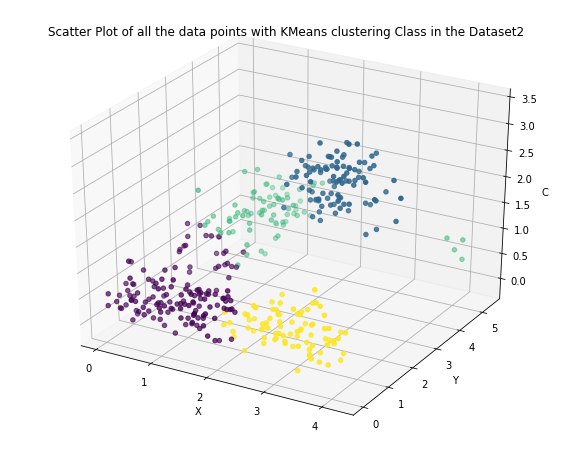

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data2_k4['X'],df_data2_k4['Y'],df_data2_k4['C'], marker="o",c=df_data2_k4['P_Class_Model'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C')
plt.title('Scatter Plot of all the data points with KMeans clustering Class in the Dataset2')
plt.show()

**Applying Hirarichal Clustering method**

In [ ]:
df_data2_hier4 = df_data2[['X','Y','C','Class']]
df_data2_hier4.head()

X         Y         C  Class
0  3.277701  0.814082  0.326574      1
1  0.387577  0.176780  0.888046      1
2  0.268546  0.582963  0.080981      1
3  2.031145  0.244597  0.643921      1
4  0.188677  0.461280  0.496633      1

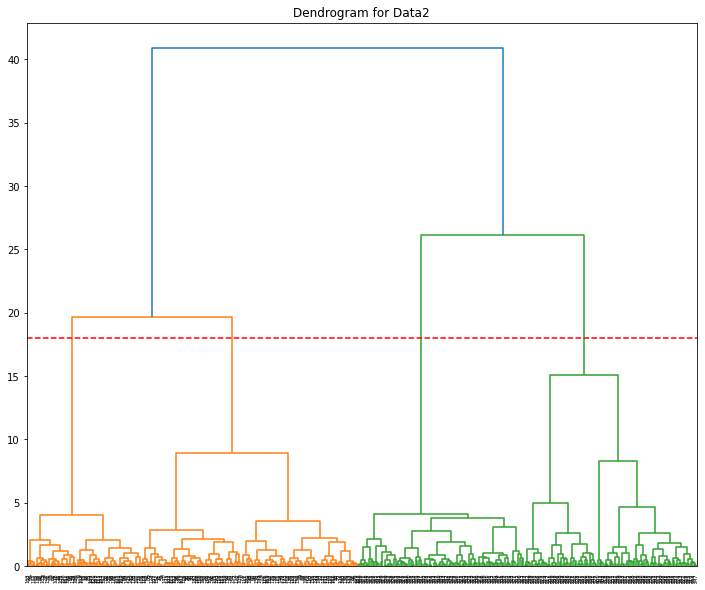

In [ ]:
#Ploting Dendrograms for the dataset2
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data2_hier4.iloc[:,0:3],method='ward'))
plt.axhline(y=18, color='r', linestyle='--')
plt.title('Dendrogram for Data2')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_hier_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_hier_4.fit_predict(df_data2_hier4.iloc[:,0:3])

array([3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [ ]:
df_data2_hier4['H_Class_Predt'] = cluster_hier_4.labels_
df_data2_hier4


X         Y         C  Class  H_Class_Predt
0    3.277701  0.814082  0.326574      1              3
1    0.387577  0.176780  0.888046      1              1
2    0.268546  0.582963  0.080981      1              1
3    2.031145  0.244597  0.643921      1              1
4    0.188677  0.461280  0.496633      1              1
..        ...       ...       ...    ...            ...
399  3.248655  2.297291  3.388138      3              2
400  4.100000  5.100000  0.504558      4              0
401  3.900000  4.900000  0.941634      4              0
402  4.000000  5.000000  0.702123      4              0
403  4.100000  5.100000  0.887645      4              0

[404 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data2_hier4['Class'],df_data2_hier4['H_Class_Predt'])

0.32425742574257427

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data2_hier4['Class'],df_data2_hier4['H_Class_Predt'], average='micro'))
print(f1_score(df_data2_hier4['Class'],df_data2_hier4['H_Class_Predt'], average='macro'))
print(f1_score(df_data2_hier4['Class'],df_data2_hier4['H_Class_Predt'], average='weighted'))

0.32425742574257427
0.1583081570996979
0.3918518740091532


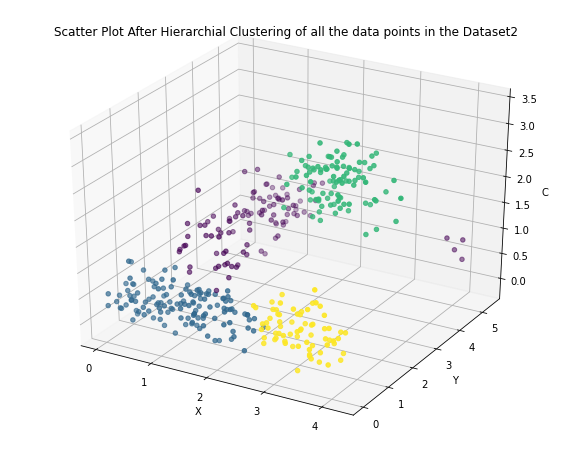

In [ ]:
#Visulaizing the data for k =4
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data2_hier4['X'],df_data2_hier4['Y'],df_data2_hier4['C'], marker="o",c=df_data2_hier4['H_Class_Predt'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C')
plt.title('Scatter Plot After Hierarchial Clustering of all the data points in the Dataset2')
plt.show()

**DataSet3**

In [ ]:
df_data3 = pd.read_csv('Data3.csv')
df_data3.head()

Unnamed: 0        X1        X2        X3  Class
0           1  1.295428  0.050829 -0.385217      1
1           2  1.409178 -0.035191 -0.251980      1
2           3  1.096803  0.246365 -0.415011      1
3           4  1.463328  0.265354 -0.513488      1
4           5  1.603284  0.080577 -0.470257      1

In [ ]:
df_data3.Class.unique()

array([1, 2, 3, 4])

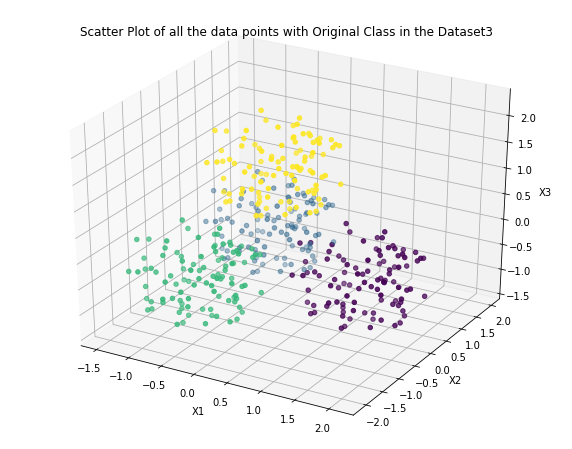

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data3['X1'],df_data3['X2'],df_data3['X3'], marker="o",c=df_data3['Class'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Original Class in the Dataset3')
plt.show()

In [ ]:
#Now applying k-Means for different values of K from 1 to 10 and compare the SSE values
for i in range(1,11):
  mdl_df_data3 = KMeans(n_clusters=i)
  mdl_df_data3.fit(df_data3.iloc[:,1:4])
  print('SSE result for '+ str(i)+' clusters is: '+ str(mdl_df_data3.inertia_))

SSE result for 1 clusters is: 955.048833021506
SSE result for 2 clusters is: 709.9931909201234
SSE result for 3 clusters is: 470.647028488733
SSE result for 4 clusters is: 229.0487999751335
SSE result for 5 clusters is: 212.89713672410943
SSE result for 6 clusters is: 197.4196927430434
SSE result for 7 clusters is: 181.62117171090574
SSE result for 8 clusters is: 165.2844874592774
SSE result for 9 clusters is: 157.06424956675545
SSE result for 10 clusters is: 147.3604805965794


In [ ]:
df_data3_k4 = df_data3[['X1','X2','X3','Class']]
df_data3_k4.head()

X1        X2        X3  Class
0  1.295428  0.050829 -0.385217      1
1  1.409178 -0.035191 -0.251980      1
2  1.096803  0.246365 -0.415011      1
3  1.463328  0.265354 -0.513488      1
4  1.603284  0.080577 -0.470257      1

In [ ]:
#For K = 4, as we have 4 classes in the data provided.
from sklearn.cluster import KMeans
mdl_df_data3_k4 = KMeans(n_clusters=4)
mdl_df_data3_k4.fit(df_data3_k4.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data3_k4.inertia_))

SSE result is : 229.0487999751335


In [ ]:
df_data3_k4['P_Class_Model'] = mdl_df_data3_k4.labels_
df_data3_k4

X1        X2        X3  Class  P_Class_Model
0    1.295428  0.050829 -0.385217      1              1
1    1.409178 -0.035191 -0.251980      1              1
2    1.096803  0.246365 -0.415011      1              1
3    1.463328  0.265354 -0.513488      1              1
4    1.603284  0.080577 -0.470257      1              1
..        ...       ...       ...    ...            ...
395  0.795695  0.209456  1.880609      4              2
396  0.653127 -0.703156  1.549448      4              2
397 -0.726249 -0.103244  0.694300      4              2
398  0.808596 -0.492640  1.649370      4              2
399  0.749291 -0.447840  0.863555      4              2

[400 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data3_k4['Class'],df_data3_k4['P_Class_Model'])

0.25

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data3_k4['Class'],df_data3_k4['P_Class_Model'], average='micro'))
print(f1_score(df_data3_k4['Class'],df_data3_k4['P_Class_Model'], average='macro'))
print(f1_score(df_data3_k4['Class'],df_data3_k4['P_Class_Model'], average='weighted'))

0.25
0.2
0.25


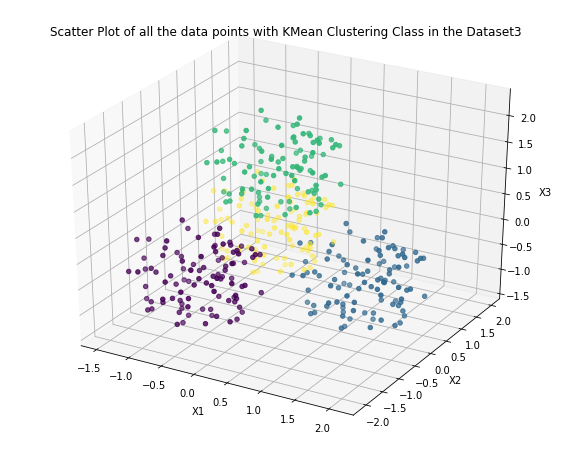

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data3_k4['X1'],df_data3_k4['X2'],df_data3_k4['X3'], marker="o",c=df_data3_k4['P_Class_Model'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with KMean Clustering Class in the Dataset3')
plt.show()

**Hirarical Clustering - Dataset3**

In [ ]:
df_data3_hier4 = df_data3[['X1','X2','X3','Class']]
df_data3_hier4.head()

X1        X2        X3  Class
0  1.295428  0.050829 -0.385217      1
1  1.409178 -0.035191 -0.251980      1
2  1.096803  0.246365 -0.415011      1
3  1.463328  0.265354 -0.513488      1
4  1.603284  0.080577 -0.470257      1

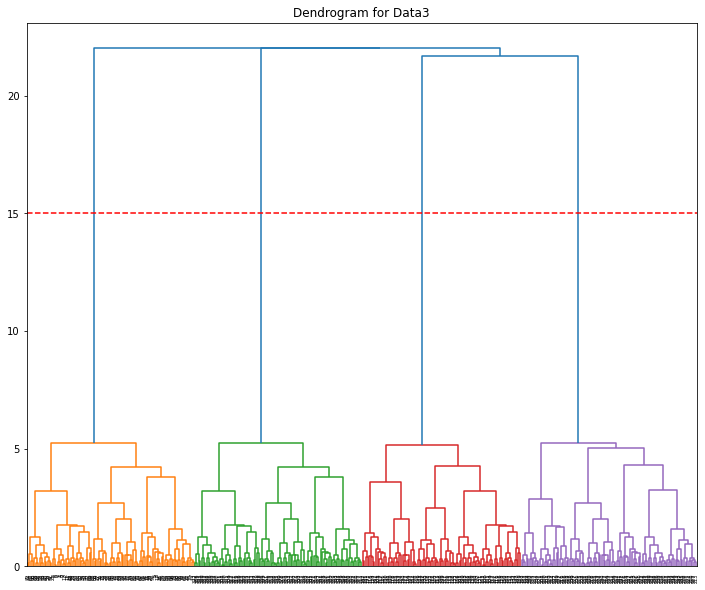

In [ ]:
#Ploting Dendrograms for the dataset1
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data3_hier4.iloc[:,0:3],method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
plt.title('Dendrogram for Data3')
plt.show()

In [ ]:
#Now checking Hirarichal for 4 clusters
from sklearn.cluster import AgglomerativeClustering
cluster_data3_hier4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_data3_hier4.fit_predict(df_data3_hier4)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

In [ ]:
df_data3_hier4['H_Class_predit'] = cluster_data3_hier4.labels_

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data3_hier4['Class'],df_data3_hier4['H_Class_predit'])

0.0

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data3_hier4['Class'],df_data3_hier4['H_Class_predit'], average='micro'))
print(f1_score(df_data3_hier4['Class'],df_data3_hier4['H_Class_predit'], average='macro'))
print(f1_score(df_data3_hier4['Class'],df_data3_hier4['H_Class_predit'], average='weighted'))

0.0
0.0
0.0


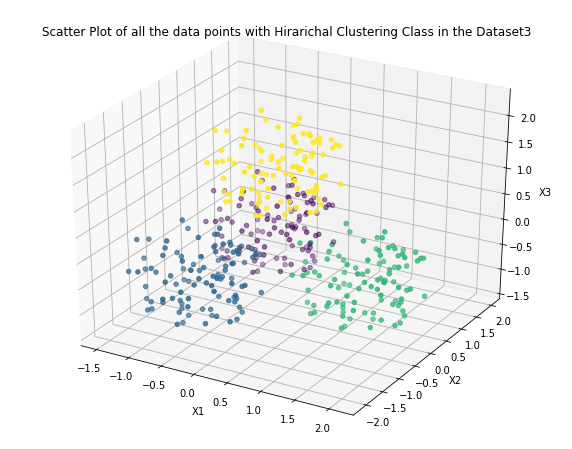

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data3_hier4['X1'],df_data3_hier4['X2'],df_data3_hier4['X3'], marker="o",c=df_data3_hier4['H_Class_predit'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Hirarichal Clustering Class in the Dataset3')
plt.show()

**Dataset 4**

In [ ]:
df_data4 = pd.read_csv('Data4.csv')
df_data4.head()

Unnamed: 0      X1     X2       X3  Class
0           1 -0.4530 -0.891  0.02300      1
1           2  0.6530 -0.846  0.02110      1
2           3  0.3980  0.913 -0.00139      1
3           4  0.0952  1.050  0.00628      1
4           5  0.5240 -0.941  0.03780      1

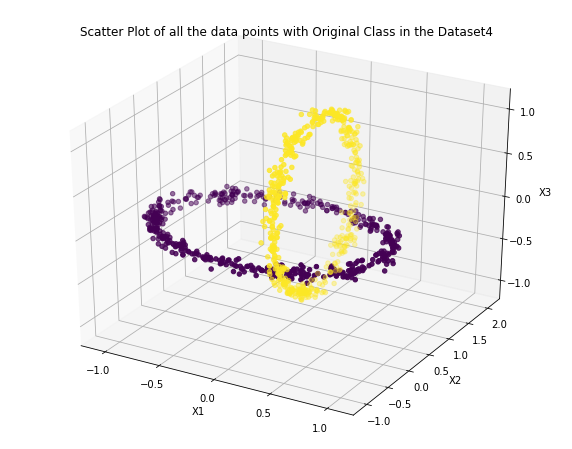

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data4['X1'],df_data4['X2'],df_data4['X3'], marker="o",c=df_data4['Class'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Original Class in the Dataset4')
plt.show()

In [ ]:
df_data4.Class.unique()

array([1, 2])

In [ ]:
#Now applying k-Means for different values of K from 1 to 10 and compare the SSE values
for i in range(1,11):
  mdl_df_data4 = KMeans(n_clusters=i)
  mdl_df_data4.fit(df_data4.iloc[:,1:4])
  print('SSE result for '+ str(i)+' clusters is: '+ str(mdl_df_data4.inertia_))

SSE result for 1 clusters is: 1245.926359029515
SSE result for 2 clusters is: 719.3476978348308
SSE result for 3 clusters is: 572.7345354509539
SSE result for 4 clusters is: 436.7378786890587
SSE result for 5 clusters is: 339.2796084911174
SSE result for 6 clusters is: 274.8660845185045
SSE result for 7 clusters is: 213.78205377952423
SSE result for 8 clusters is: 166.62558313094493
SSE result for 9 clusters is: 141.41810213837877
SSE result for 10 clusters is: 116.34017053973949


In [ ]:
df_data4_k2 = df_data4[['X1','X2','X3','Class']]
df_data4_k2.head()

X1     X2       X3  Class
0 -0.4530 -0.891  0.02300      1
1  0.6530 -0.846  0.02110      1
2  0.3980  0.913 -0.00139      1
3  0.0952  1.050  0.00628      1
4  0.5240 -0.941  0.03780      1

In [ ]:
#For k = 2 as we have only 2 classes in dataset given.
from sklearn.cluster import KMeans
mdl_df_data4 = KMeans(n_clusters=2)
mdl_df_data4.fit(df_data4_k2.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data4.inertia_))

SSE result is : 719.3443269685367


In [ ]:
df_data4_k2['P_Class_Model'] = mdl_df_data4.labels_

In [ ]:
df_data4_k2

X1      X2       X3  Class  P_Class_Model
0   -0.45300 -0.8910  0.02300      1              0
1    0.65300 -0.8460  0.02110      1              0
2    0.39800  0.9130 -0.00139      1              1
3    0.09520  1.0500  0.00628      1              1
4    0.52400 -0.9410  0.03780      1              0
..       ...     ...      ...    ...            ...
995  0.01520  0.0531 -0.36100      2              0
996  0.05160  0.6910  0.87500      2              1
997 -0.00511  1.3900 -0.94700      2              1
998 -0.06710  0.7140  0.88100      2              1
999 -0.05770  0.4280 -0.73000      2              1

[1000 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data4_k2['Class'],df_data4_k2['P_Class_Model'])

0.173

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data4_k2['Class'],df_data4_k2['P_Class_Model'], average='micro'))
print(f1_score(df_data4_k2['Class'],df_data4_k2['P_Class_Model'], average='macro'))
print(f1_score(df_data4_k2['Class'],df_data4_k2['P_Class_Model'], average='weighted'))


0.173
0.11544878211544878
0.17317317317317316


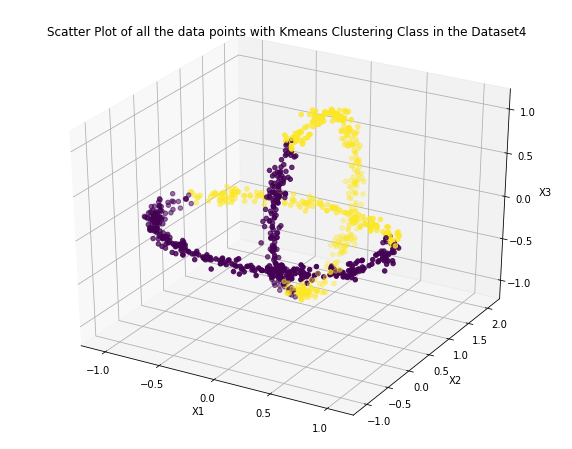

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data4_k2['X1'],df_data4_k2['X2'],df_data4_k2['X3'], marker="o",c=df_data4_k2['P_Class_Model'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Kmeans Clustering Class in the Dataset4')
plt.show()

In [ ]:
df_data4_hier2 = df_data4[['X1','X2','X3','Class']]
df_data4_hier2.head()

X1     X2       X3  Class
0 -0.4530 -0.891  0.02300      1
1  0.6530 -0.846  0.02110      1
2  0.3980  0.913 -0.00139      1
3  0.0952  1.050  0.00628      1
4  0.5240 -0.941  0.03780      1

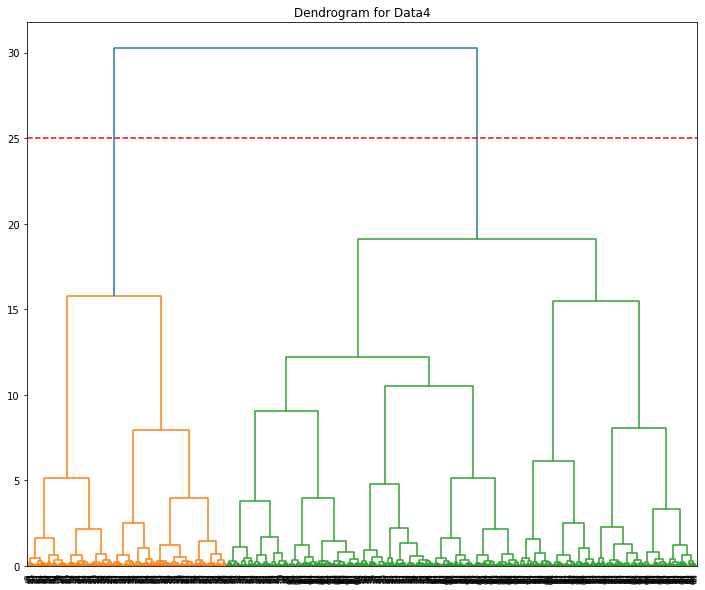

In [ ]:
#Ploting Dendrograms for the dataset4
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data4_hier2.iloc[:,0:3],method='ward'))
plt.axhline(y=25, color='r', linestyle='--')
plt.title('Dendrogram for Data4')
plt.show()

In [ ]:
#Now checking Hirarichal for 2 clusters
from sklearn.cluster import AgglomerativeClustering
cluster_data4_hier2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_data4_hier2.fit_predict(df_data4_hier2)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
df_data4_hier2['H_Class_Predt'] = cluster_data4_hier2.labels_
df_data4_hier2

X1      X2       X3  Class  H_Class_Predt
0   -0.45300 -0.8910  0.02300      1              1
1    0.65300 -0.8460  0.02110      1              1
2    0.39800  0.9130 -0.00139      1              0
3    0.09520  1.0500  0.00628      1              0
4    0.52400 -0.9410  0.03780      1              1
..       ...     ...      ...    ...            ...
995  0.01520  0.0531 -0.36100      2              0
996  0.05160  0.6910  0.87500      2              0
997 -0.00511  1.3900 -0.94700      2              0
998 -0.06710  0.7140  0.88100      2              0
999 -0.05770  0.4280 -0.73000      2              0

[1000 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data4_hier2['Class'],df_data4_hier2['H_Class_Predt'])

0.299

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data4_hier2['Class'],df_data4_hier2['H_Class_Predt'], average='micro'))
print(f1_score(df_data4_hier2['Class'],df_data4_hier2['H_Class_Predt'], average='macro'))
print(f1_score(df_data4_hier2['Class'],df_data4_hier2['H_Class_Predt'], average='weighted'))

0.299
0.24947851481017938
0.3742177722152691


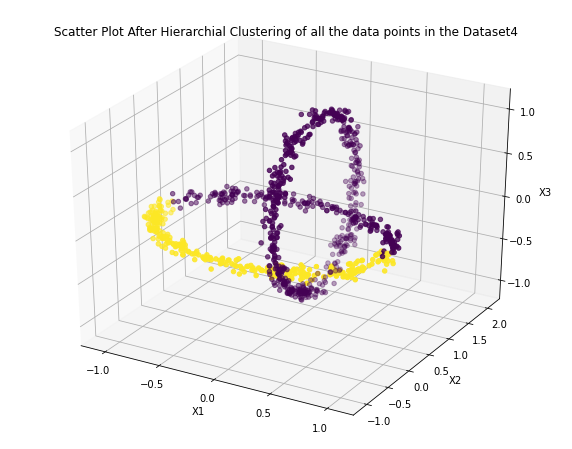

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data4_hier2['X1'],df_data4_hier2['X2'],df_data4_hier2['X3'], marker="o",c=df_data4_hier2['H_Class_Predt'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot After Hierarchial Clustering of all the data points in the Dataset4')
plt.show()

**DATASET - 5**

In [ ]:
df_data5 = pd.read_csv('Data5.csv')
df_data5.head()

Unnamed: 0         X1         X2         X3  Class
0           1  -4.822490 -50.402170   4.020861      1
1           2 -44.460120  20.964670 -11.492060      1
2           3  50.001020   0.780748   9.134460      1
3           4 -41.699080 -22.310060  16.314120      1
4           5   4.425242  -4.666664  50.223740      1

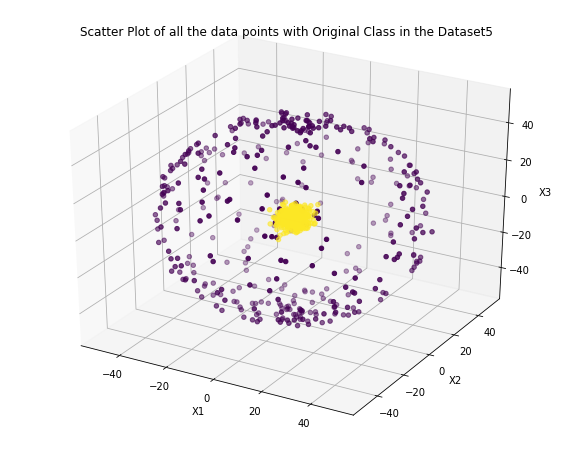

In [ ]:
#plotting the given dataset-5
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data5['X1'],df_data5['X2'],df_data5['X3'], marker="o",c=df_data5['Class'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Original Class in the Dataset5')
plt.show()

**Applying KMeans**

In [ ]:
#Now checking k-Means for different values of K from 1 to 10 and compare the SSE values
from sklearn.cluster import KMeans
x = df_data5.iloc[:,1:4]
for i in range(1,11):
  mdl_df_data5 = KMeans(n_clusters=i)
  mdl_df_data5.fit(df_data5.iloc[:,1:4])
  print('SSE result for '+ str(i)+' clusters is: '+ str(mdl_df_data5.inertia_))

SSE result for 1 clusters is: 1012159.47540978
SSE result for 2 clusters is: 754086.0396742994
SSE result for 3 clusters is: 582363.371738073
SSE result for 4 clusters is: 486658.664722223
SSE result for 5 clusters is: 397541.7454809702
SSE result for 6 clusters is: 323531.31367536116
SSE result for 7 clusters is: 263291.3353067595
SSE result for 8 clusters is: 232701.66491710307
SSE result for 9 clusters is: 208878.958233108
SSE result for 10 clusters is: 185027.11329657005


**Checking for any Null Values**

In [ ]:
df_data5.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

In [ ]:
df_data5.describe()

Unnamed: 0          X1          X2          X3       Class
count    800.0000  800.000000  800.000000  800.000000  800.000000
mean     400.5000   -0.611640   -0.921962    0.824385    1.500000
std      231.0844   18.771445   18.472153   23.941496    0.500313
min        1.0000  -49.464740  -50.461010  -50.592120    1.000000
25%      200.7500   -4.443038   -4.950855   -4.424578    1.000000
50%      400.5000    0.109752   -0.407613    0.537025    1.500000
75%      600.2500    4.713370    3.885574    6.120185    2.000000
max      800.0000   50.001020   50.598880   50.585700    2.000000

**Since there are 2 classes, we are taking K = 2**

In [ ]:
from sklearn.cluster import KMeans
df_datak2 = KMeans(n_clusters=2)
df_datak2.fit(df_data5.iloc[:,1:4])
print('SSE Cohesive Data: '+ str(df_datak2.inertia_))

SSE Cohesive Data: 754101.0996201246


In [ ]:
df_data5_k = df_data5[['X1', 'X2', 'X3', 'Class']]
df_data5_k

X1         X2         X3  Class
0    -4.822490 -50.402170   4.020861      1
1   -44.460120  20.964670 -11.492060      1
2    50.001020   0.780748   9.134460      1
3   -41.699080 -22.310060  16.314120      1
4     4.425242  -4.666664  50.223740      1
..         ...        ...        ...    ...
795  -1.531027   0.681636   0.543271      2
796   0.500754  -1.848209   0.605654      2
797   1.089574  -0.246493  -3.355758      2
798  -1.907717   4.964502   2.098423      2
799   3.415463   4.529521  -1.617736      2

[800 rows x 4 columns]

In [ ]:
df_data5_k['P_Class_Model'] = df_datak2.labels_
df_data5_k

X1         X2         X3  Class  P_Class_Model
0    -4.822490 -50.402170   4.020861      1              0
1   -44.460120  20.964670 -11.492060      1              0
2    50.001020   0.780748   9.134460      1              0
3   -41.699080 -22.310060  16.314120      1              1
4     4.425242  -4.666664  50.223740      1              1
..         ...        ...        ...    ...            ...
795  -1.531027   0.681636   0.543271      2              0
796   0.500754  -1.848209   0.605654      2              0
797   1.089574  -0.246493  -3.355758      2              0
798  -1.907717   4.964502   2.098423      2              0
799   3.415463   4.529521  -1.617736      2              0

[800 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data5_k['Class'],df_data5_k['P_Class_Model'])

0.21375

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data5_k['Class'],df_data5_k['P_Class_Model'], average='micro'))
print(f1_score(df_data5_k['Class'],df_data5_k['P_Class_Model'], average='macro'))
print(f1_score(df_data5_k['Class'],df_data5_k['P_Class_Model'], average='weighted'))

0.21375
0.19964973730297722
0.29947460595446584


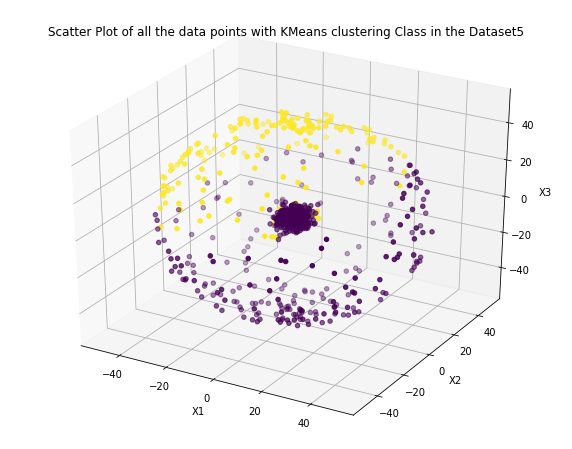

In [ ]:
#visualization of dataset5 after k means clustering
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data5_k['X1'],df_data5_k['X2'], df_data5_k['X3'], marker="o",c=df_data5_k['P_Class_Model'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with KMeans clustering Class in the Dataset5')
plt.show()

**Hierarchial Clustering for Dataset-5**

In [ ]:
df_data5_hira_K2 = df_data5[['X1','X2','X3','Class']]
df_data5_hira_K2.head()

X1         X2         X3  Class
0  -4.822490 -50.402170   4.020861      1
1 -44.460120  20.964670 -11.492060      1
2  50.001020   0.780748   9.134460      1
3 -41.699080 -22.310060  16.314120      1
4   4.425242  -4.666664  50.223740      1

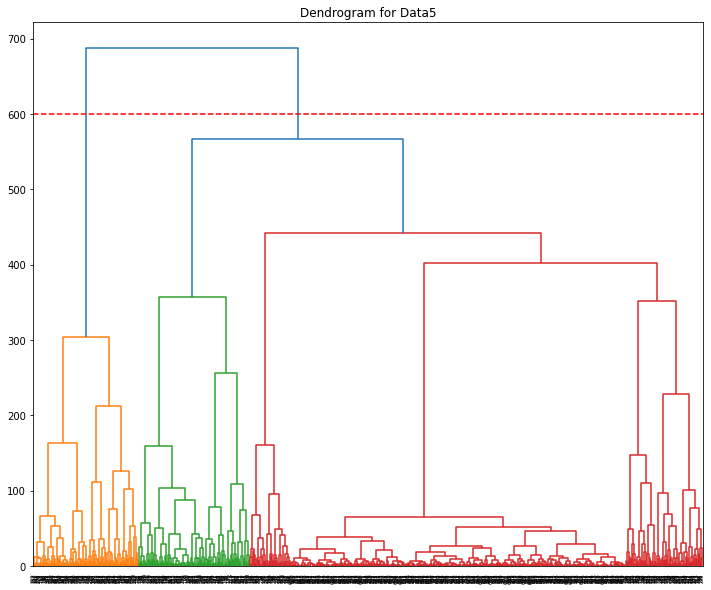

In [ ]:
#Ploting Dendrograms for the dataset5
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data5_hira_K2.iloc[:,0:3],method='ward'))
plt.axhline(y=600, color='r', linestyle='--')
plt.title('Dendrogram for Data5')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_hier.fit_predict(df_data5_hira_K2.iloc[:,0:3])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
df_data5_hira_K2['H_Class_Predt'] = cluster_hier.labels_+1
df_data5_hira_K2

X1         X2         X3  Class  H_Class_Predt
0    -4.822490 -50.402170   4.020861      1              2
1   -44.460120  20.964670 -11.492060      1              1
2    50.001020   0.780748   9.134460      1              1
3   -41.699080 -22.310060  16.314120      1              1
4     4.425242  -4.666664  50.223740      1              1
..         ...        ...        ...    ...            ...
795  -1.531027   0.681636   0.543271      2              1
796   0.500754  -1.848209   0.605654      2              1
797   1.089574  -0.246493  -3.355758      2              1
798  -1.907717   4.964502   2.098423      2              1
799   3.415463   4.529521  -1.617736      2              1

[800 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data5_hira_K2['Class'],df_data5_hira_K2['H_Class_Predt'])

0.3425

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data5_hira_K2['Class'],df_data5_hira_K2['H_Class_Predt'], average='micro'))
print(f1_score(df_data5_hira_K2['Class'],df_data5_hira_K2['H_Class_Predt'], average='macro'))
print(f1_score(df_data5_hira_K2['Class'],df_data5_hira_K2['H_Class_Predt'], average='weighted'))

0.3425
0.25512104283054005
0.25512104283054005


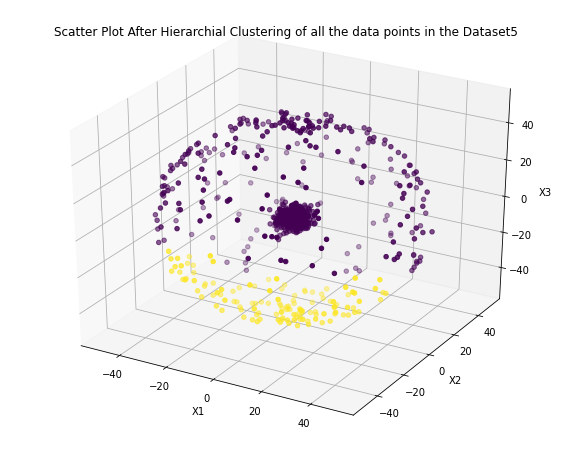

In [ ]:
#Visulaizing the data for 2 clusters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data5_hira_K2['X1'],df_data5_hira_K2['X2'],df_data5_hira_K2['X3'], marker="o",c=df_data5_hira_K2['H_Class_Predt'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot After Hierarchial Clustering of all the data points in the Dataset5')
plt.show()

**Dataset - 6**

In [ ]:
df_data6 = pd.read_csv('Data6.csv')
df_data6.describe()

Unnamed: 0           X1           X2        Class
count  4096.00000  4096.000000  4096.000000  4096.000000
mean   2048.50000     1.279324     1.714045     1.500000
std    1182.55768     1.454175     1.732789     0.500061
min       1.00000    -3.075178    -3.298857     1.000000
25%    1024.75000     0.276844     0.371124     1.000000
50%    2048.50000     1.156726     1.494928     1.500000
75%    3072.25000     2.190571     2.983782     2.000000
max    4096.00000     6.728720     7.793648     2.000000

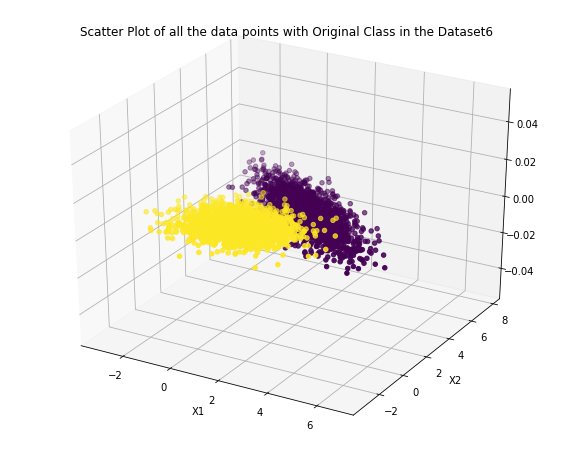

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data6['X1'],df_data6['X2'], marker="o",c=df_data6['Class'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.title('Scatter Plot of all the data points with Original Class in the Dataset6')
plt.show()

**Applying K Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
for i in range(1,11):
  df_ = KMeans(n_clusters=i)
  df_.fit(df_data6.iloc[:,1:2])
  print('SSE Cohesive Data: '+ str(df_.inertia_))

SSE Cohesive Data: 8659.391820915818
SSE Cohesive Data: 3107.261935030041
SSE Cohesive Data: 1609.5031497046696
SSE Cohesive Data: 973.7242486507023
SSE Cohesive Data: 664.6447317746005
SSE Cohesive Data: 471.6505247763055
SSE Cohesive Data: 358.0525770965928
SSE Cohesive Data: 272.84998297347204
SSE Cohesive Data: 218.6083172837974
SSE Cohesive Data: 177.3695535988059


**For k = 2**

In [ ]:
from sklearn.cluster import KMeans
df_datak2 = KMeans(n_clusters=2)
df_datak2.fit(df_data6.iloc[:,1:2])
print('SSE Cohesive Data: '+ str(df_datak2.inertia_))

SSE Cohesive Data: 3107.311599566829


In [ ]:
df_data6_k = df_data6[['X1', 'X2', 'Class']]
df_data6_k

X1        X2  Class
0     1.388261  2.076096      1
1     2.177247  3.102304      1
2     0.378645  5.307610      1
3     3.681732  1.622681      1
4     2.462861  2.777897      1
...        ...       ...    ...
4091  0.909687  0.375763      2
4092  2.698381  0.511262      2
4093  1.078797  1.526153      2
4094  1.974889 -0.649343      2
4095 -0.127192 -0.763974      2

[4096 rows x 3 columns]

In [ ]:
df_data6_k['P_Class_Model'] = df_datak2.labels_
df_data6_k

X1        X2  Class  P_Class_Model
0     1.388261  2.076096      1              0
1     2.177247  3.102304      1              1
2     0.378645  5.307610      1              0
3     3.681732  1.622681      1              1
4     2.462861  2.777897      1              1
...        ...       ...    ...            ...
4091  0.909687  0.375763      2              0
4092  2.698381  0.511262      2              1
4093  1.078797  1.526153      2              0
4094  1.974889 -0.649343      2              1
4095 -0.127192 -0.763974      2              0

[4096 rows x 4 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data6_k['Class'],df_data6_k['P_Class_Model'])

0.33056640625

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data6_k['Class'],df_data6_k['P_Class_Model'], average='micro'))
print(f1_score(df_data6_k['Class'],df_data6_k['P_Class_Model'], average='macro'))
print(f1_score(df_data6_k['Class'],df_data6_k['P_Class_Model'], average='weighted'))

0.33056640625
0.24090383417845387
0.3613557512676808


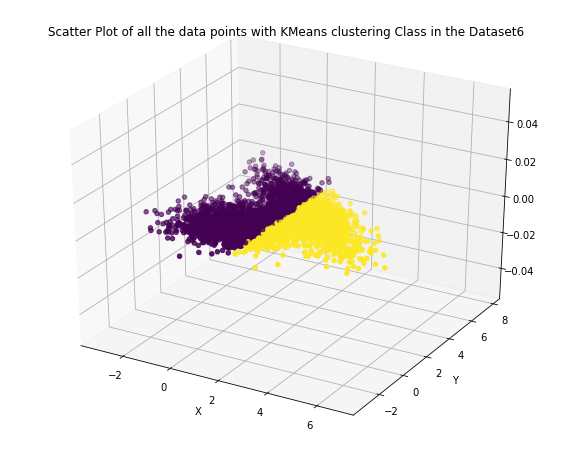

In [ ]:
#visualization of dataset 6 after K Means Clustering
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data6_k['X1'],df_data6_k['X2'], marker="o",c=df_data6_k['P_Class_Model'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Scatter Plot of all the data points with KMeans clustering Class in the Dataset6')
plt.show()

**Hierarchial Clustering for Dataset-6**

In [ ]:
df_data6_hmodel = df_data6[['X1','X2','Class']]
df_data6_hmodel.head()

X1        X2  Class
0  1.388261  2.076096      1
1  2.177247  3.102304      1
2  0.378645  5.307610      1
3  3.681732  1.622681      1
4  2.462861  2.777897      1

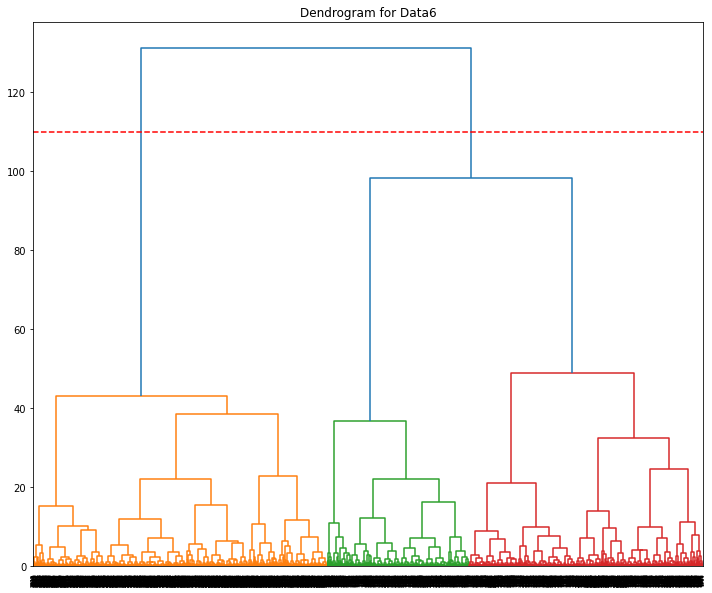

In [ ]:
#Ploting Dendrograms for the dataset6
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data6_hmodel.iloc[:,0:2],method='ward'))
plt.axhline(y=110, color='r', linestyle='--')
plt.title('Dendrogram for Data6')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_hier_6 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_hier_6.fit_predict(df_data6_hmodel.iloc[:,0:2])

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
df_data6_hmodel['H_Class_Predt'] = cluster_hier_6.labels_
df_data6_hmodel

X1        X2  Class  H_Class_Predt
0     1.388261  2.076096      1              0
1     2.177247  3.102304      1              0
2     0.378645  5.307610      1              0
3     3.681732  1.622681      1              0
4     2.462861  2.777897      1              0
...        ...       ...    ...            ...
4091  0.909687  0.375763      2              1
4092  2.698381  0.511262      2              0
4093  1.078797  1.526153      2              1
4094  1.974889 -0.649343      2              1
4095 -0.127192 -0.763974      2              1

[4096 rows x 4 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data6_hmodel['Class'],df_data6_hmodel['H_Class_Predt'])

0.0078125

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data6_hmodel['Class'],df_data6_hmodel['H_Class_Predt'], average='micro'))
print(f1_score(df_data6_hmodel['Class'],df_data6_hmodel['H_Class_Predt'], average='macro'))
print(f1_score(df_data6_hmodel['Class'],df_data6_hmodel['H_Class_Predt'], average='weighted'))

0.0078125
0.005544005544005543
0.008316008316008315


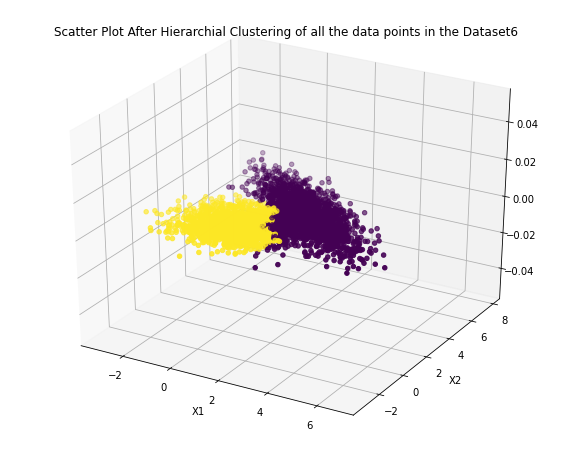

In [ ]:
#Visulaizing of the dataset 5 after hierarchial clustering
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data6_hmodel['X1'],df_data6_hmodel['X2'], marker="o",c=df_data6_hmodel['H_Class_Predt'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.title('Scatter Plot After Hierarchial Clustering of all the data points in the Dataset6')
plt.show()

**Dataset-7**

In [ ]:
df_data7 = pd.read_csv('Data7.csv')
df_data7

Unnamed: 0        X1        X2  Class
0             1 -3.000000 -3.000000      5
1             2 -3.000000  3.000000      4
2             3  3.000000 -3.000000      6
3             4  3.000000  3.000000      3
4             5 -0.417091  0.114782      1
..          ...       ...       ...    ...
765         766 -1.604434 -1.118861      2
766         767 -3.050000 -3.050000      5
767         768 -3.050000  2.950000      4
768         769  2.950000 -3.050000      6
769         770  2.950000  2.950000      3

[770 rows x 4 columns]

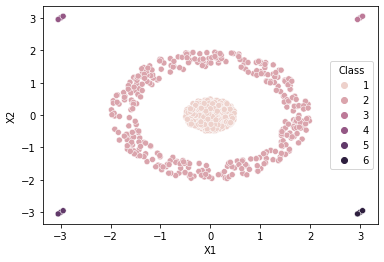

In [ ]:
import seaborn as sns
sns.scatterplot(x='X1', y='X2', data=df_data7, hue='Class')

**Applying K Means**

In [ ]:
#Now applying k-Means for different values of K from 1 to 10 and compare the SSE values
for i in range(1,11):
  mdl_df_data7 = KMeans(n_clusters=i)
  mdl_df_data7.fit(df_data7.iloc[:,1:3])
  print('SSE result for '+ str(i)+' clusters is: '+ str(mdl_df_data7.inertia_))

SSE result for 1 clusters is: 1405.350117356539
SSE result for 2 clusters is: 1017.1826721777252
SSE result for 3 clusters is: 711.7754907114007
SSE result for 4 clusters is: 501.4416772358233
SSE result for 5 clusters is: 340.0955869531268
SSE result for 6 clusters is: 274.0986756895017
SSE result for 7 clusters is: 228.59880230053807
SSE result for 8 clusters is: 197.8370680630541
SSE result for 9 clusters is: 177.65459220036524
SSE result for 10 clusters is: 158.0983811376126


In [ ]:
df_data7_k6= df_data7[['X1','X2','Class']]
df_data7_k6.head()

X1        X2  Class
0 -3.000000 -3.000000      5
1 -3.000000  3.000000      4
2  3.000000 -3.000000      6
3  3.000000  3.000000      3
4 -0.417091  0.114782      1

**For K=6**

In [ ]:
#For K = 6
from sklearn.cluster import KMeans
mdl_df_data7_k6 = KMeans(n_clusters=6)
mdl_df_data7_k6.fit(df_data7_k6.iloc[:,0:2])
print('SSE result is : '+ str(mdl_df_data7_k6.inertia_))

SSE result is : 274.73165759812554


In [ ]:
df_data7_k6['P_Class_Model'] = mdl_df_data7_k6.labels_
df_data7_k6

X1        X2  Class  P_Class_Model
0   -3.000000 -3.000000      5              2
1   -3.000000  3.000000      4              0
2    3.000000 -3.000000      6              4
3    3.000000  3.000000      3              3
4   -0.417091  0.114782      1              5
..        ...       ...    ...            ...
765 -1.604434 -1.118861      2              2
766 -3.050000 -3.050000      5              2
767 -3.050000  2.950000      4              0
768  2.950000 -3.050000      6              4
769  2.950000  2.950000      3              3

[770 rows x 4 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data7_k6['Class'],df_data7_k6['P_Class_Model'])

0.1025974025974026

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data7_k6['Class'],df_data7_k6['P_Class_Model'], average='micro'))
print(f1_score(df_data7_k6['Class'],df_data7_k6['P_Class_Model'], average='macro'))
print(f1_score(df_data7_k6['Class'],df_data7_k6['P_Class_Model'], average='weighted'))

0.1025974025974026
0.05945436562020545
0.1624018787732466


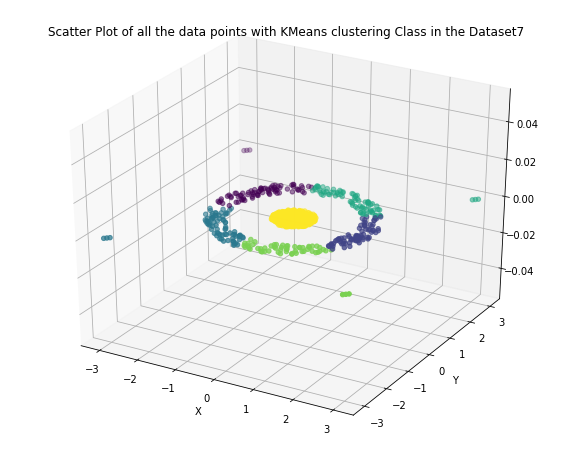

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data7_k6['X1'],df_data7_k6['X2'],marker="o",c=df_data7_k6['P_Class_Model'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('Scatter Plot of all the data points with KMeans clustering Class in the Dataset7')
plt.show()

**Hierarchical Clustering for Dataset-7**

In [ ]:
df_data7_hier6 = df_data7[['X1','X2','Class']]
df_data7_hier6.head()

X1        X2  Class
0 -3.000000 -3.000000      5
1 -3.000000  3.000000      4
2  3.000000 -3.000000      6
3  3.000000  3.000000      3
4 -0.417091  0.114782      1

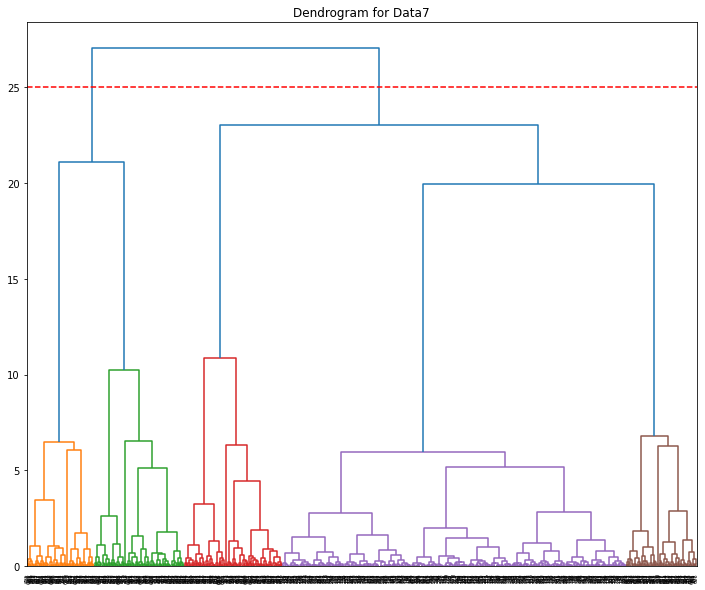

In [ ]:
#Ploting Dendrograms for the dataset7
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data7_hier6.iloc[:,0:2],method='ward'))
plt.axhline(y=25, color='r', linestyle='--')
plt.title('Dendrogram for Data7')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster_hier_6 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_hier_6.fit_predict(df_data7_hier6.iloc[:,0:3])

array([1, 2, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
df_data7_hier6['H_Class_Predt'] = cluster_hier_6.labels_
df_data7_hier6

X1        X2  Class  H_Class_Predt
0   -3.000000 -3.000000      5              1
1   -3.000000  3.000000      4              2
2    3.000000 -3.000000      6              0
3    3.000000  3.000000      3              4
4   -0.417091  0.114782      1              3
..        ...       ...    ...            ...
765 -1.604434 -1.118861      2              1
766 -3.050000 -3.050000      5              1
767 -3.050000  2.950000      4              2
768  2.950000 -3.050000      6              0
769  2.950000  2.950000      3              4

[770 rows x 4 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data7_hier6['Class'],df_data7_hier6['H_Class_Predt'])

0.14285714285714285

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data7_hier6['Class'],df_data7_hier6['H_Class_Predt'], average='micro'))
print(f1_score(df_data7_hier6['Class'],df_data7_hier6['H_Class_Predt'], average='macro'))
print(f1_score(df_data7_hier6['Class'],df_data7_hier6['H_Class_Predt'], average='weighted'))

0.14285714285714285
0.06602641056422569
0.2178871548619448


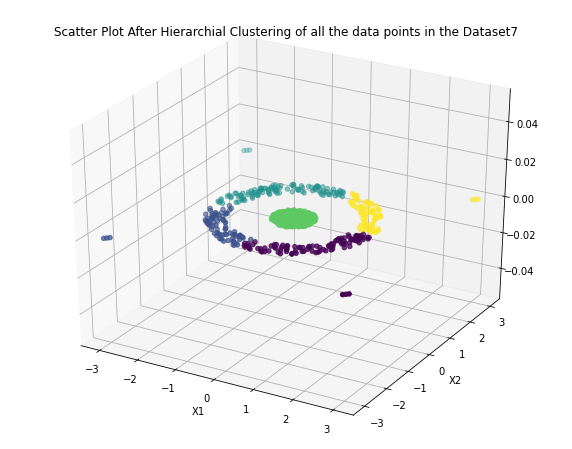

In [ ]:
#Visulaizing the data for k =5
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data7_hier6['X1'],df_data7_hier6['X2'], marker="o",c=df_data7_hier6['H_Class_Predt'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.title('Scatter Plot After Hierarchial Clustering of all the data points in the Dataset7')
plt.show()

**Dataset - 8**

In [ ]:
df_data8 = pd.read_csv('Data8.csv')
df_data8.head()

Unnamed: 0        X1        X2       X3  Class
0           1  0.000000  0.000000  1.00000      1
1           2  0.000000  0.052336  0.99863      1
2           3  0.049774  0.016173  0.99863      1
3           4  0.030762 -0.042341  0.99863      1
4           5 -0.030762 -0.042341  0.99863      1

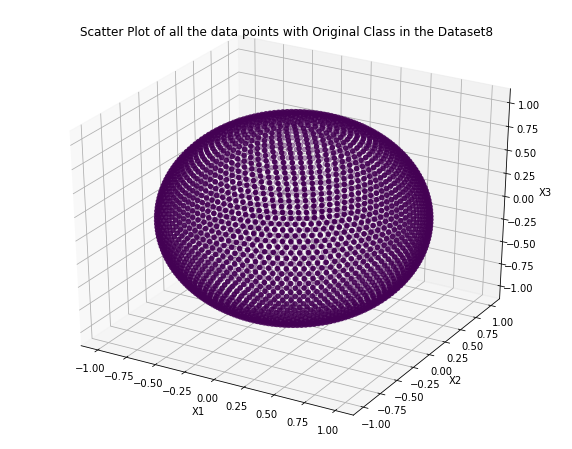

In [ ]:
#Visualization of the Dataset-8
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data8['X1'],df_data8['X2'],df_data8['X3'], marker="o",c=df_data8['Class'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Original Class in the Dataset8')
plt.show()

In [ ]:
df_data8.describe()

Unnamed: 0            X1            X2           X3   Class
count  4002.000000  4.002000e+03  4.002000e+03  4002.000000  4002.0
mean   2001.500000 -1.775469e-18 -6.658009e-19     0.000000     1.0
std    1155.422217  5.792099e-01  5.792099e-01     0.573831     0.0
min       1.000000 -1.000000e+00 -1.000000e+00    -1.000000     1.0
25%    1001.250000 -5.069495e-01 -5.039030e-01    -0.500000     1.0
50%    2001.500000  0.000000e+00  0.000000e+00     0.000000     1.0
75%    3001.750000  5.069495e-01  5.039030e-01     0.500000     1.0
max    4002.000000  1.000000e+00  1.000000e+00     1.000000     1.0

**Applying K Means Clustering**

In [ ]:
for i in range(1,11):
  mdl_df_data8 = KMeans(n_clusters=i)
  mdl_df_data8.fit(df_data8.iloc[:,1:4])
  print('SSE result for '+ str(i)+' clusters is: '+ str(mdl_df_data8.inertia_))

SSE result for 1 clusters is: 4002.0002739281686
SSE result for 2 clusters is: 2992.701014783355
SSE result for 3 clusters is: 2296.73186713762
SSE result for 4 clusters is: 1778.99958269223
SSE result for 5 clusters is: 1497.4143366115266
SSE result for 6 clusters is: 1226.0972157640776
SSE result for 7 clusters is: 1085.8229006664433
SSE result for 8 clusters is: 954.6263541192016
SSE result for 9 clusters is: 856.6121062433081
SSE result for 10 clusters is: 777.5636997726947


In [ ]:
df_data8_k3 = df_data8[['X1','X2','X3','Class']]
df_data8_k3.head()

X1        X2       X3  Class
0  0.000000  0.000000  1.00000      1
1  0.000000  0.052336  0.99863      1
2  0.049774  0.016173  0.99863      1
3  0.030762 -0.042341  0.99863      1
4 -0.030762 -0.042341  0.99863      1

**For k = 3**

In [ ]:
#For K = 3, as we have 3 classes in the data provided.
from sklearn.cluster import KMeans
mdl_df_data8_k3 = KMeans(n_clusters=3)
mdl_df_data8_k3.fit(df_data8_k3.iloc[:,0:3])
print('SSE result is : '+ str(mdl_df_data8_k3.inertia_))

SSE result is : 2296.549876993513


In [ ]:
df_data8_k3['P_Class_Model'] = mdl_df_data8_k3.labels_
df_data8_k3

X1        X2       X3  Class  P_Class_Model
0     0.000000  0.000000  1.00000      1              2
1     0.000000  0.052336  0.99863      1              2
2     0.049774  0.016173  0.99863      1              2
3     0.030762 -0.042341  0.99863      1              2
4    -0.030762 -0.042341  0.99863      1              2
...        ...       ...      ...    ...            ...
3997  0.049774 -0.016173 -0.99863      1              1
3998  0.000000 -0.052336 -0.99863      1              1
3999 -0.049774 -0.016173 -0.99863      1              1
4000 -0.030762  0.042341 -0.99863      1              1
4001  0.000000  0.000000 -1.00000      1              1

[4002 rows x 5 columns]

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data8_k3['Class'],df_data8_k3['P_Class_Model'])

0.33308345827086455

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data8_k3['Class'],df_data8_k3['P_Class_Model'], average='micro'))
print(f1_score(df_data8_k3['Class'],df_data8_k3['P_Class_Model'], average='macro'))
print(f1_score(df_data8_k3['Class'],df_data8_k3['P_Class_Model'], average='weighted'))

0.33308345827086455
0.16657294595438923
0.49971883786316773


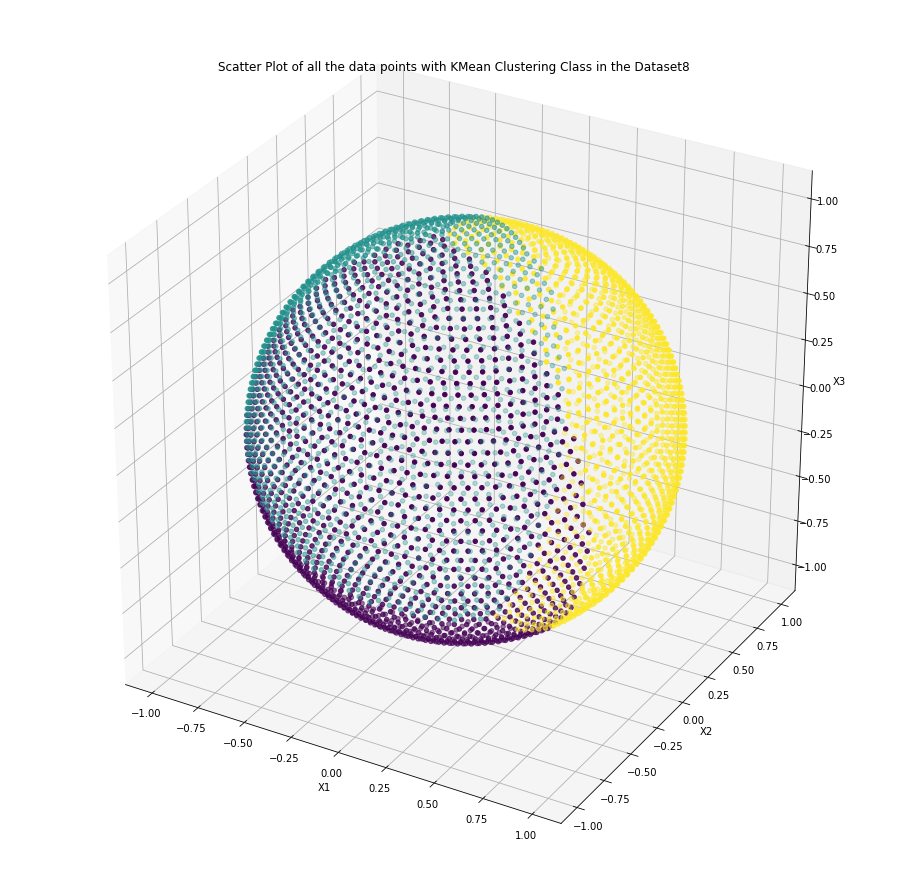

In [ ]:
#Visualization of the dataset-8
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data8_k3['X1'],df_data8_k3['X2'],df_data8_k3['X3'], marker="o",c=df_data8_k3['P_Class_Model'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with KMean Clustering Class in the Dataset8')
plt.show()

**Hierarchical Clustering for Dataset-8** 

In [ ]:
df_data8_hier3 = df_data8[['X1','X2','X3','Class']]
df_data8_hier3.head()

X1        X2       X3  Class
0  0.000000  0.000000  1.00000      1
1  0.000000  0.052336  0.99863      1
2  0.049774  0.016173  0.99863      1
3  0.030762 -0.042341  0.99863      1
4 -0.030762 -0.042341  0.99863      1

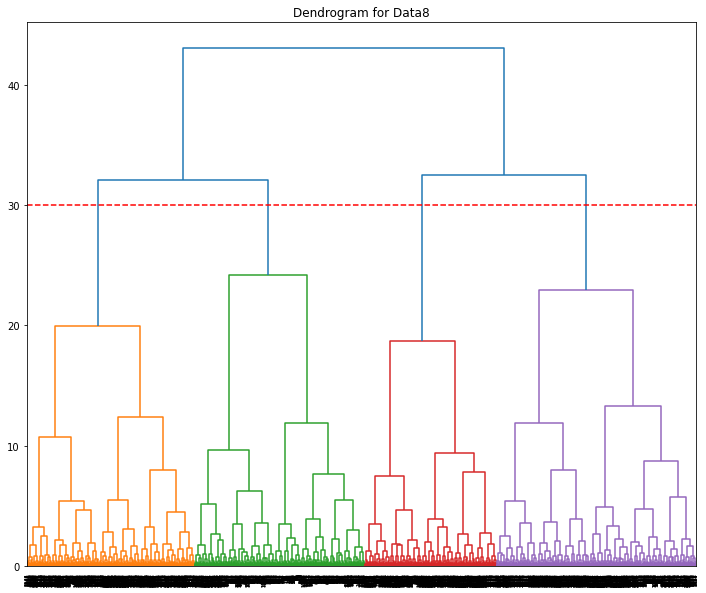

In [ ]:
#Ploting Dendrograms for the dataset8
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(12,10))
dend_graph = shc.dendrogram(shc.linkage(df_data8_hier3.iloc[:,0:3],method='ward'))
plt.axhline(y=30, color='r', linestyle='--')
plt.title('Dendrogram for Data8')
plt.show()

In [ ]:
#Now checking Hirarichal for 4 clusters
from sklearn.cluster import AgglomerativeClustering
cluster_data8_hier3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster_data8_hier3.fit_predict(df_data8_hier3)

array([0, 0, 0, ..., 2, 1, 2])

In [ ]:
df_data8_hier3['H_Class_predit'] = cluster_data8_hier3.labels_

In [ ]:
#using accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(df_data8_hier3['Class'],df_data8_hier3['H_Class_predit'])

0.29810094952523736

In [ ]:
#using f1 score
from sklearn.metrics import f1_score
print(f1_score(df_data8_hier3['Class'],df_data8_hier3['H_Class_predit'], average='micro'))
print(f1_score(df_data8_hier3['Class'],df_data8_hier3['H_Class_predit'], average='macro'))
print(f1_score(df_data8_hier3['Class'],df_data8_hier3['H_Class_predit'], average='weighted'))

0.29810094952523736
0.11482194417709335
0.4592877767083734


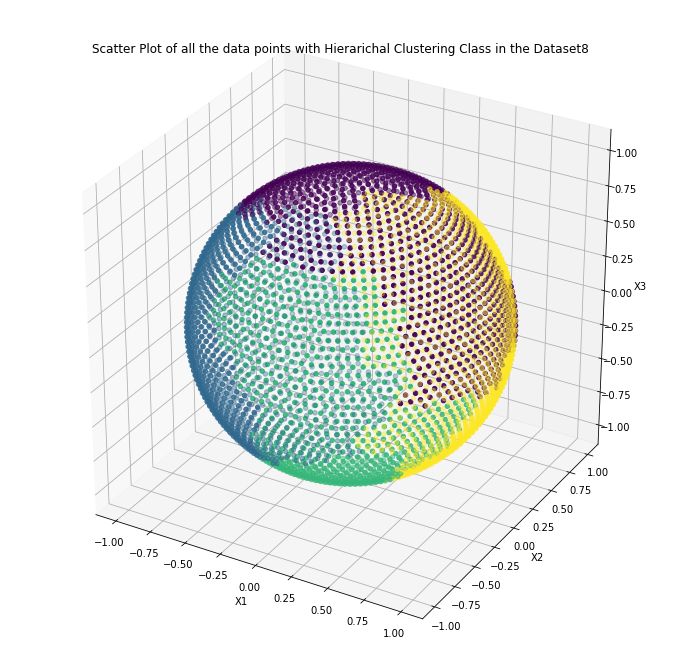

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_data8_hier3['X1'],df_data8_hier3['X2'],df_data8_hier3['X3'], marker="o",c=df_data8_hier3['H_Class_predit'])
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Scatter Plot of all the data points with Hierarichal Clustering Class in the Dataset8 ')
plt.show()